In [24]:
import pandas as pd
import numpy as nu
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time

In [166]:
nu.random.seed(42)

In [167]:
def parser(s):
    return datetime.strptime(s, '%m/%d/%Y %H:%M')

In [168]:
#readdata
df = pd.read_csv('data/cryptocurrency/gemini_BTCUSD_2020_1min.csv', parse_dates=[1], date_parser=parser)

C:\Users\TCS\AppData\Local\Temp\ipykernel_143324\2909290732.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('data/cryptocurrency/gemini_BTCUSD_2020_1min.csv', parse_dates=[1], date_parser=parser)


In [169]:
df.head(4)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.618880e+12,2021-04-20 00:02:00,BTCUSD,55717.47,55723.00,55541.69,55541.69,2.406734
1,1.618880e+12,2021-04-20 00:01:00,BTCUSD,55768.94,55849.82,55711.74,55717.47,0.573458
2,1.618880e+12,2021-04-20 00:00:00,BTCUSD,55691.79,55793.15,55691.79,55768.94,3.309904
3,1.618880e+12,2021-04-19 23:59:00,BTCUSD,55777.86,55777.86,55677.92,55691.79,0.684934


In [170]:
df['Dindex'] = df.Date.dt.date
df['Dindex'] = pd.to_datetime(df['Dindex'])

In [171]:
df['Dindex']

0        2021-04-20
1        2021-04-20
2        2021-04-20
3        2021-04-19
4        2021-04-19
            ...    
658060   2020-01-01
658061   2020-01-01
658062   2020-01-01
658063   2020-01-01
658064   2020-01-01
Name: Dindex, Length: 658065, dtype: datetime64[ns]

In [172]:
df.set_index('Dindex', inplace=True)

In [173]:
df.head(3)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
Dindex,,,,,,,,
2021-04-20,1.618880e+12,2021-04-20 00:02:00,BTCUSD,55717.47,55723.00,55541.69,55541.69,2.406734
2021-04-20,1.618880e+12,2021-04-20 00:01:00,BTCUSD,55768.94,55849.82,55711.74,55717.47,0.573458
2021-04-20,1.618880e+12,2021-04-20 00:00:00,BTCUSD,55691.79,55793.15,55691.79,55768.94,3.309904


In [174]:
df.index.dtype

dtype('<M8[ns]')

In [175]:
df = df.apply(pd.to_numeric, errors='coerce')
#  Step 4: Check for duplicates
duplicate_dates = df.index[df.index.duplicated(keep=False)]
if not duplicate_dates.empty:
    print("Duplicate Dates Found:")
    print(duplicate_dates)

# Step 5: Aggregate data if necessary (for example, taking the mean)
# This step is optional and depends on your analysis needs
df_aggregated = df.groupby(df.index).mean()  # Replace .mean() with your desired aggregation method


Duplicate Dates Found:
DatetimeIndex(['2021-04-20', '2021-04-20', '2021-04-20', '2021-04-19',
               '2021-04-19', '2021-04-19', '2021-04-19', '2021-04-19',
               '2021-04-19', '2021-04-19',
               ...
               '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='Dindex', length=658057, freq=None)


In [176]:
# Step 8: Define date range for slicing
start_date = datetime(2020, 1, 1).date()
end_date = datetime(2020, 6, 1).date()

# Step 9: Slice the DataFrame using date objects
vol = df_aggregated[start_date:end_date]['Volume']

# Print the resulting DataFrame
print("Sliced DataFrame:")
print(vol)

Sliced DataFrame:
Dindex
2020-01-01    0.539334
2020-01-02    0.683432
2020-01-03    0.897452
2020-01-04    0.279609
2020-01-05    0.385259
                ...   
2020-05-28    1.130059
2020-05-29    1.087964
2020-05-30    0.934123
2020-05-31    0.660497
2020-06-01    3.103124
Name: Volume, Length: 153, dtype: float64


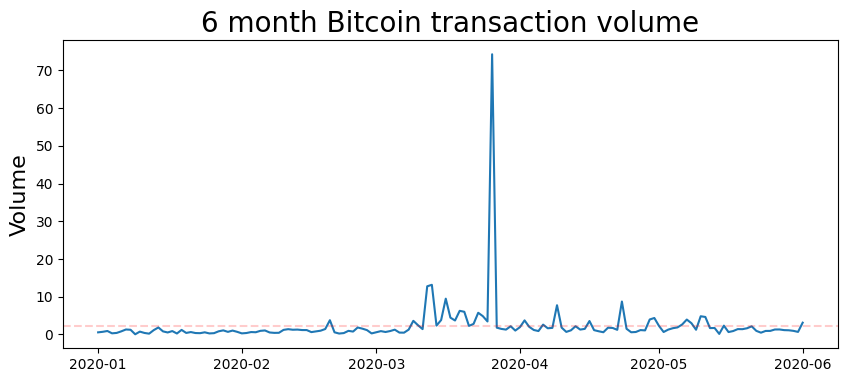

In [177]:
plt.figure(figsize=(10,4))
plt.plot(vol)
plt.title('6 month Bitcoin transaction volume', fontsize=20)
plt.ylabel('Volume', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(vol.mean(), color='r', alpha=0.2, linestyle='--')

In [249]:
first_diff = vol.diff()[2:]

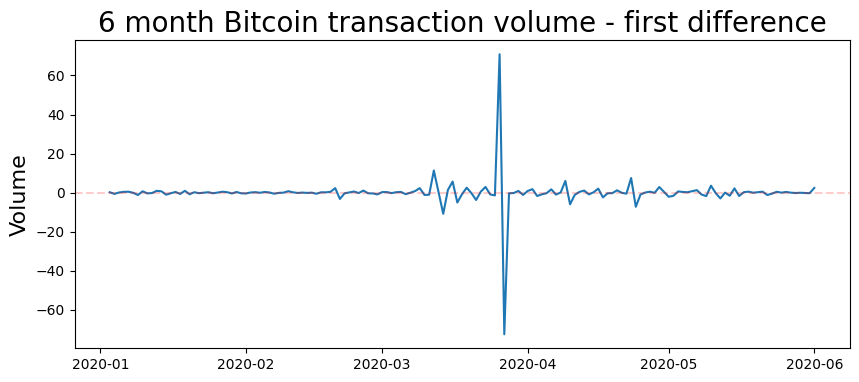

In [250]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('6 month Bitcoin transaction volume - first difference', fontsize=20)
plt.ylabel('Volume', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(first_diff.mean(), color='r', alpha=0.2, linestyle='--')

<BarContainer object of 20 artists>

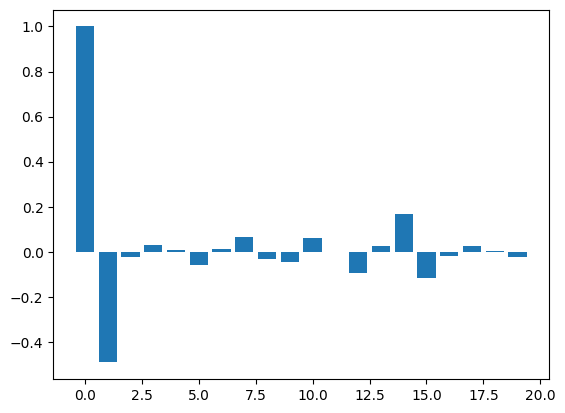

In [251]:
acf_vals = acf(first_diff)
plt.bar(range(20), acf_vals[:20])

<BarContainer object of 20 artists>

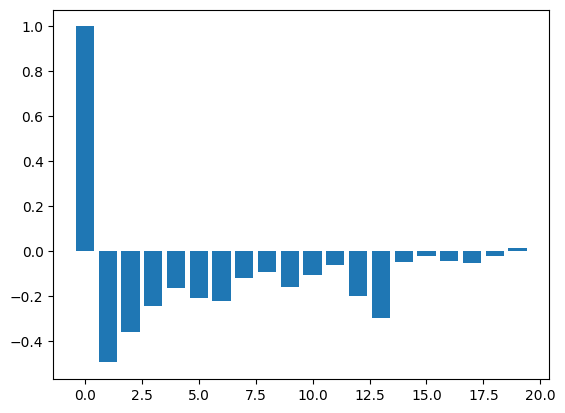

In [252]:
pacf_vals = pacf(first_diff)
plt.bar(range(20), pacf_vals[:20])

In [253]:
first_diff = first_diff.apply(pd.to_numeric, errors='coerce')
#  Step 4: Check for duplicates
duplicate_dates = first_diff.index[first_diff.index.duplicated(keep=False)]
if not duplicate_dates.empty:
    print("Duplicate Dates Found:")
    print(duplicate_dates)

# Step 5: Aggregate data if necessary (for example, taking the mean)
# This step is optional and depends on your analysis needs
first_diff_aggregated = first_diff.groupby(first_diff.index).mean()  # Replace .mean() with your desired aggregation method
# first_diff.index.dtype

In [254]:
first_diff_aggregated

Dindex
2020-01-03    0.214020
2020-01-04   -0.617843
2020-01-05    0.105651
2020-01-06    0.421301
2020-01-07    0.492458
                ...   
2020-05-28   -0.174596
2020-05-29   -0.042095
2020-05-30   -0.153841
2020-05-31   -0.273626
2020-06-01    2.442627
Name: Volume, Length: 151, dtype: float64

In [255]:
train_end = datetime(2020,5,1).date()
test_end = datetime(2020,6,1).date()

train_data = first_diff_aggregated[:train_end]
test_data = first_diff_aggregated[train_end + timedelta(days=1):test_end]

In [256]:
print("test data:", test_data)

test data: Dindex
2020-05-02   -1.609318
2020-05-03    0.636410
2020-05-04    0.369087
2020-05-05    0.212232
2020-05-06    0.773410
2020-05-07    1.304805
2020-05-08   -0.962165
2020-05-09   -1.740467
2020-05-10    3.580037
2020-05-11   -0.186325
2020-05-12   -2.951824
2020-05-13    0.027400
2020-05-14   -1.572294
2020-05-15    2.192034
2020-05-16   -1.698213
2020-05-17    0.265609
2020-05-18    0.516133
2020-05-19   -0.018429
2020-05-20    0.244078
2020-05-21    0.512405
2020-05-22   -1.202425
2020-05-23   -0.481397
2020-05-24    0.457602
2020-05-25    0.010715
2020-05-26    0.370665
2020-05-27    0.011959
2020-05-28   -0.174596
2020-05-29   -0.042095
2020-05-30   -0.153841
2020-05-31   -0.273626
2020-06-01    2.442627
Name: Volume, dtype: float64


In [344]:
model = ARIMA(train_data, order=(15,0,1))

c:\Users\TCS\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\TCS\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\TCS\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [345]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 1.0905213356018066


c:\Users\TCS\anaconda3\envs\timeseries\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [346]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                  120
Model:                ARIMA(15, 0, 1)   Log Likelihood                -400.344
Date:                Sun, 20 Oct 2024   AIC                            836.689
Time:                        23:47:59   BIC                            886.864
Sample:                    01-03-2020   HQIC                           857.065
                         - 05-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0145      0.309      0.047      0.963      -0.591       0.620
ar.L1         -0.5422     30.919     -0.018      0.986     -61.143      60.059
ar.L2         -0.4843     28.778     -0.017      0.9

In [347]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [348]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

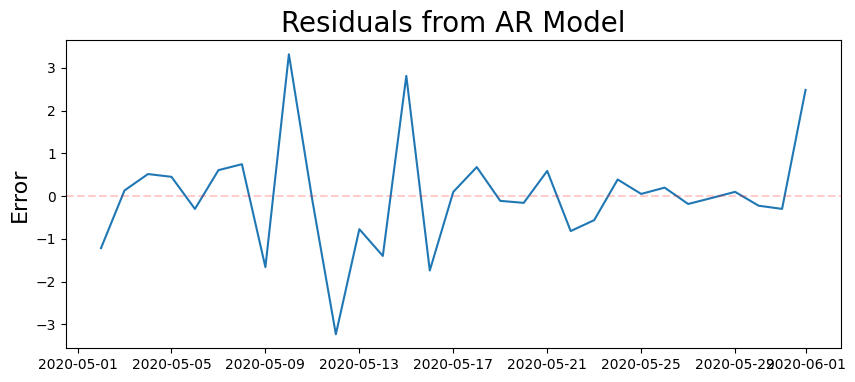

In [349]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

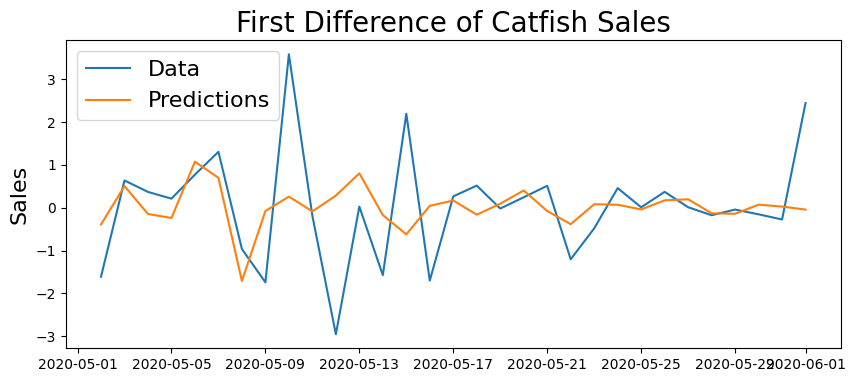

In [350]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [351]:
print('Root Mean Squared Error:', nu.sqrt(nu.mean(residuals**2)))

Root Mean Squared Error: 1.2593698363223165
